# **Product Review Sentiment Analysis**
The goal of this project is to analyse customer reviews to determine their sentiment (positive, negative or neutral) based on the text content of the reviews and associated metadata. This will help in understanding customer feedback, identifying product strengths and weaknesses and improving the overall customer experience by offering actionable insights.

---

### **Problem Statement**
E-commerce platforms like Amazon, Jumia, Konga, Ebay, Ali Express and other online retailers in Nigeria and beyond collect millions of product reviews daily. These reviews are rich sources of customer feedback but are often unstructured, making manual analysis time-consuming and inefficient. Companies often need to quickly interpret the sentiments expressed in these reviews to understand how customers feel about their products, identify key pain points and adjust their business strategies accordingly. However, sorting through vast amounts of text data to understand customer sentiment (positive, neutral, or negative) poses a significant challenge. This project aims to automate the process of sentiment analysis using machine learning (ML) and natural language processing (NLP) techniques. By automating sentiment detection, businesses can gain real-time insights from reviews, leading to better decision-making, improved product offerings and enhanced customer satisfaction.

---

### **Key Steps in the Project**

1. **Data Collection**: Utilise the provided dataset containing customer reviews and associated metadata, such as star ratings and product categories.
2. **Data Preprocessing**: Handle missing data, clean text (e.g remove noise and irrelevant symbols) and standardise review content.
3. **Sentiment Labelling**: Use star ratings to label reviews as negative (1-2 stars), neutral (3 stars) or positive (4-5 stars).
4. **Exploratory Data Analysis (EDA)**:  Visualise the distribution of sentiments across different product categories and review ratings.
5. **Feature Extraction and Text Processing**: Convert review text into numerical features using tokenization, stopword removal and TF-IDF vectorization.
6. **Model Selection and Model Training**: Train a machine learning model (such as logistic regression, random forest or neural networks) to predict review sentiment based on extracted features.
7. **Model Evaluation**: Assess model performance using accuracy, precision, recall and F1 score to ensure reliable sentiment predictions.
8. **Performance Metrics**: Analyse metrics like confusion matrix and detailed performance scores to understand the strengths and weaknesses of the model.
9. **Building a Sentiment Analysis Dashboard with Streamlit and Real-Time Sentiment Prediction**: Create an interactive dashboard to visualise sentiment distribution and allow users to input reviews for real-time sentiment predictions.
10. **Business Insights and Recommendations**: Provide actionable insights and recommendations to businesses to improve product offerings based on patterns identified in customer feedback.

### **Step 1: Importing Required Libraries and Data Collection** ###

In [83]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import warnings
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [84]:
# Text preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# For creating word clouds
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
# Loading the dataset with the correct delimiter
file_path = r"/content/Amazon Product Review.txt"
data = pd.read_csv(file_path, delimiter=",", encoding="utf-8")

In [86]:
# Display the first few rows of the dataset to verify its structure
print(data.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     11555559  R1QXC7AHHJBQ3O  B00IKPX4GY         2693241   
1          US     31469372  R175VSRV6ZETOP  B00IKPYKWG         2693241   
2          US     26843895  R2HRFF78MWGY19  B00IKPW0UA         2693241   
3          US     19844868   R8Q39WPKYVSTX  B00LCHSHMS         2693241   
4          US      1189852  R3RL4C8YP2ZCJL  B00IKPZ5V6         2693241   

                           product_title product_category  star_rating  \
0  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
1  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            3   
2  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
3  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            4   
4  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   

   helpful_votes  total_votes vine verified_purchase  \
0              0            0    N                 Y  

In [87]:
# Rename columns if necessary
data.columns = data.columns.str.strip()

### **Step 2 - Data Preprocessing** ###

In [88]:
import re

In [89]:
# Drop rows with missing values in 'review_headline' or 'review_body'
data.dropna(subset=['review_headline', 'review_body'], inplace=True)

In [90]:
# Function to clean text data
stop_words = set(stopwords.words('english'))

def clean_text(txt):
    txt = re.sub(r'<.*?>', '', txt)  # Remove HTML tags
    txt = re.sub(r'[^\w\s]', '', txt)  # Remove punctuation
    txt = re.sub(r'\d+', '', txt)      # Remove numbers
    txt = txt.lower()                   # Convert to lowercase
    return ' '.join([word for word in txt.split() if word not in stop_words])


In [91]:
data['cleaned_headline'] = data['review_headline'].apply(clean_text)
data['cleaned_body'] = data['review_body'].apply(clean_text)

# Check cleaned data
data[['cleaned_headline', 'cleaned_body']].head()

,cleaned_headline,cleaned_body
0,five stars,great love
1,lots ads slow processing speed occasionally sh...,lots adsslow processing speedoccasionally shut...
2,well thought device,excellent unit versatility tablet besides comp...
3,appsgames looking forward using compatible tab...,bought amazon prime ended buying gb one camera...
4,five stars,amazon products continue meet expectations


### **Step 3 - Sentiment Labelling** ###

In [92]:
# Function to label sentiment based on star ratings
def label_sentiment(star_rating):
    if star_rating in [1, 2]:
        return 'negative'
    elif star_rating == 3:
        return 'neutral'
    elif star_rating in [4, 5]:
        return 'positive'
    else:
        return 'unknown'  # In case of unexpected values

In [93]:
# Applying the function to the 'star_rating' column
data['sentiment_label'] = data['star_rating'].apply(label_sentiment)

# Verify the new column
print("Sentiment labels based on star ratings:")
print(data[['star_rating', 'sentiment_label']].head())

Sentiment labels based on star ratings:
   star_rating sentiment_label
0            5        positive
1            3         neutral
2            5        positive
3            4        positive
4            5        positive


In [94]:
print(data['sentiment_label'].value_counts())

sentiment_label
positive    25763
negative     2861
neutral      2216
Name: count, dtype: int64


### **Step 4 - Exploratory Data Analysis (EDA)** ###

<Figure size 1600x700 with 0 Axes>

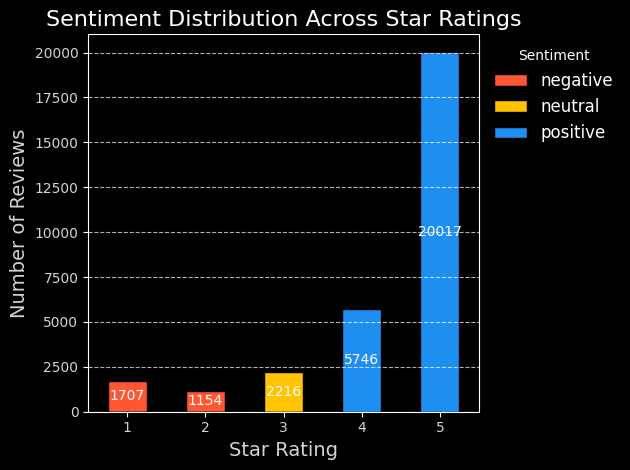

Sentiment counts by star rating:
sentiment_label  negative  neutral  positive
star_rating                                 
1                  1707.0      0.0       0.0
2                  1154.0      0.0       0.0
3                     0.0   2216.0       0.0
4                     0.0      0.0    5746.0
5                     0.0      0.0   20017.0


In [95]:
import matplotlib.pyplot as plt

# 1. Sentiment Distribution Across Star Ratings
plt.style.use('dark_background')  # Set a style with a dark background

# Count the sentiment labels for each star rating
sentiment_counts_by_rating = data.groupby('star_rating')['sentiment_label'].value_counts().unstack().fillna(0)

# Plot the distribution of sentiment across star ratings
plt.figure(figsize=(16, 7))
ax = sentiment_counts_by_rating.plot(
    kind='bar',
    stacked=True,
    color=['#FF5733', '#FFC300', '#1F8EF1'],  # Red for negative, yellow for neutral, blue for positive
    edgecolor='black'
)

# Add annotations to each bar
for i, bar_group in enumerate(sentiment_counts_by_rating.values):
    for j, value in enumerate(bar_group):
        if value > 0:  # Avoid annotating bars with 0 value
            plt.text(
                i,
                sum(bar_group[:j]) + value / 2,  # Position: stack height
                int(value),  # Text: count
                ha='center', va='center', color='white', fontsize=10
            )

# Set title and axis labels
plt.title('Sentiment Distribution Across Star Ratings', fontsize=16, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Number of Reviews', fontsize=14, color='lightgray')

# Customize ticks
plt.xticks(rotation=0, color='lightgray')
plt.yticks(color='lightgray')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize legend
plt.legend(
    title='Sentiment',
    fontsize=12,
    bbox_to_anchor=(1, 1),
    loc='upper left',
    frameon=False
)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot as an image
plt.savefig('sentiment_distribution_star_ratings.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print sentiment counts for validation
print("Sentiment counts by star rating:")
print(sentiment_counts_by_rating)


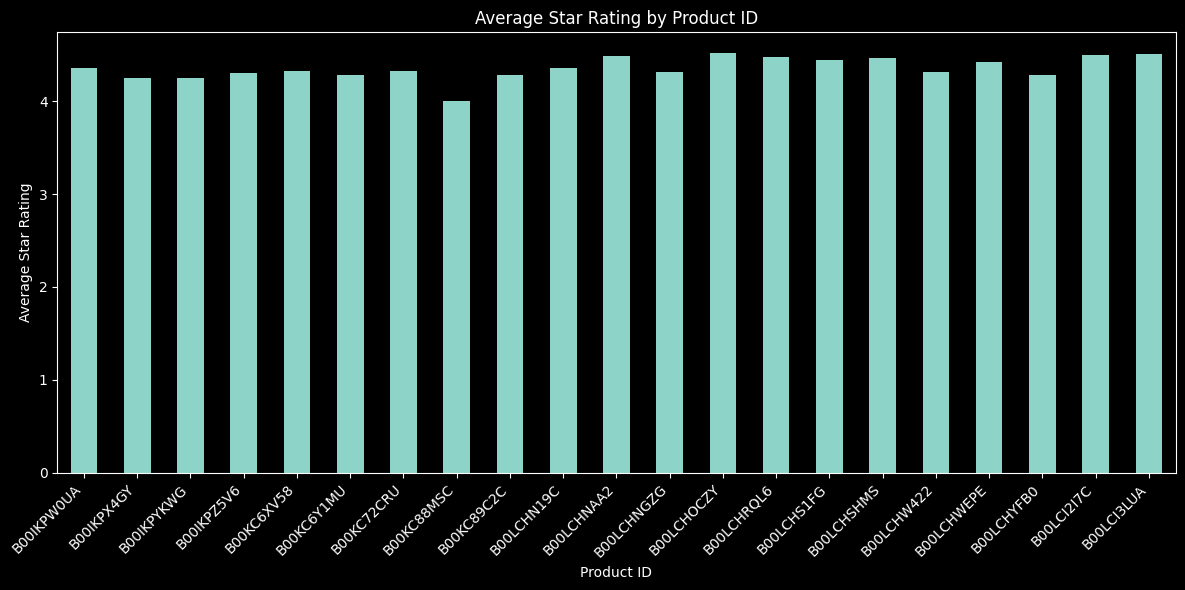

In [118]:
#Plot for Average Star Rating by Product ID
plt.figure(figsize=(12, 6))
average_rating_by_product.plot(kind='bar')
plt.title('Average Star Rating by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<Figure size 1800x800 with 0 Axes>

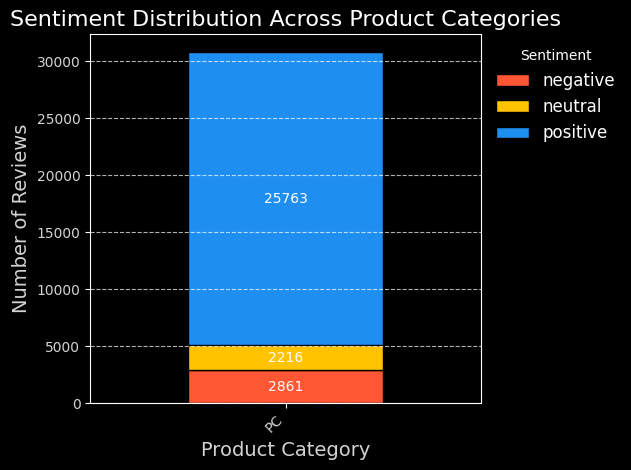

Sentiment counts by product category:
sentiment_label   negative  neutral  positive
product_category                             
PC                    2861     2216     25763


In [96]:
import matplotlib.pyplot as plt

# 2. Sentiment Distribution Across Product Categories

plt.figure(figsize=(18, 8))  # Set figure size for product categories

# Count the sentiment labels for each product category
sentiment_counts_by_category = data.groupby('product_category')['sentiment_label'].value_counts().unstack().fillna(0)

# Plot the distribution of sentiment across product categories
ax = sentiment_counts_by_category.plot(
    kind='bar',
    stacked=True,
    color=['#FF5733', '#FFC300', '#1F8EF1'],  # Red for negative, yellow for neutral, blue for positive
    edgecolor='black'
)

# Add annotations to each bar
for i, bar_group in enumerate(sentiment_counts_by_category.values):
    for j, value in enumerate(bar_group):
        if value > 0:  # Avoid annotating bars with 0 value
            plt.text(
                i,
                sum(bar_group[:j]) + value / 2,  # Position: stack height
                int(value),  # Text: count
                ha='center', va='center', color='white', fontsize=10
            )

# Set title and axis labels
plt.title('Sentiment Distribution Across Product Categories', fontsize=16, color='white')
plt.xlabel('Product Category', fontsize=14, color='lightgray')
plt.ylabel('Number of Reviews', fontsize=14, color='lightgray')

# Customize ticks
plt.xticks(rotation=45, ha='right', color='lightgray')  # Rotate x-axis labels for readability
plt.yticks(color='lightgray')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize legend
plt.legend(
    title='Sentiment',
    fontsize=12,
    bbox_to_anchor=(1, 1),
    loc='upper left',
    frameon=False
)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot as an image
plt.savefig('sentiment_distribution_product_categories.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print sentiment counts for validation
print("Sentiment counts by product category:")
print(sentiment_counts_by_category)


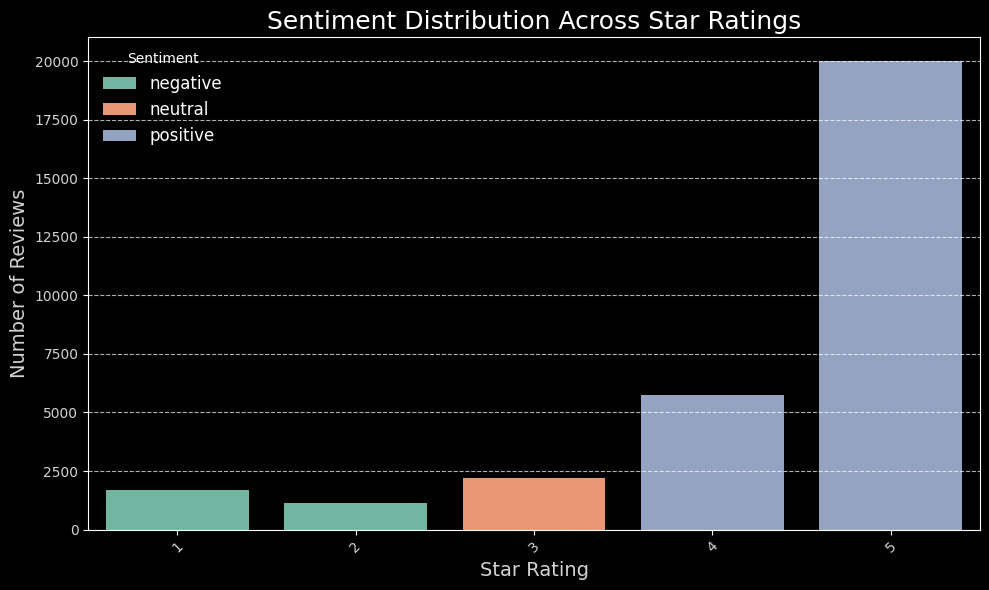

In [97]:
# 3. Star Rating Distribution by Sentiment

# Set a figure size
plt.figure(figsize=(10, 6))

# Count plot for sentiment distribution across star ratings
sns.countplot(
    data=data,
    x='star_rating',
    hue='sentiment_label',
    palette='Set2',  # 'Set2' is a nice, readable color palette
)

# Set plot title and axis labels
plt.title('Sentiment Distribution Across Star Ratings', fontsize=18, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Number of Reviews', fontsize=14, color='lightgray')

# Set legend title and font size
plt.legend(title='Sentiment', fontsize=12, loc='upper left', frameon=False)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, color='lightgray')

# Set y-axis ticks to be light gray
plt.yticks(color='lightgray')

# Optional: Add gridlines to the y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


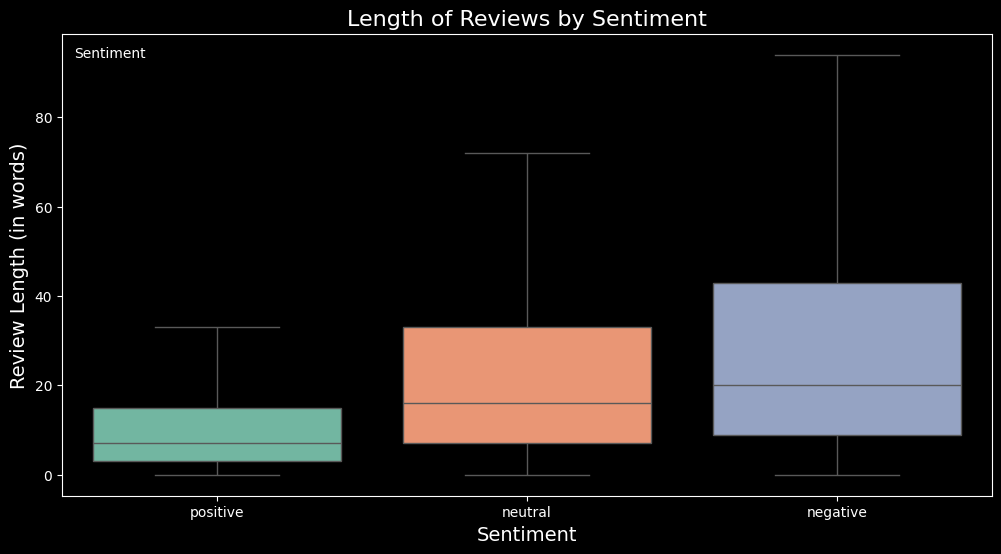

In [113]:
# Calculate the length of each review body
data['review_length'] = data['cleaned_review_body'].apply(lambda x: len(x.split()))

# Plot the length of reviews by sentiment label
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment_label', y='review_length', data=data, hue='sentiment_label', palette='Set2', showfliers=False)
plt.title('Length of Reviews by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Review Length (in words)', fontsize=14)
plt.legend(title='Sentiment', loc='upper left', frameon=False)
plt.show()

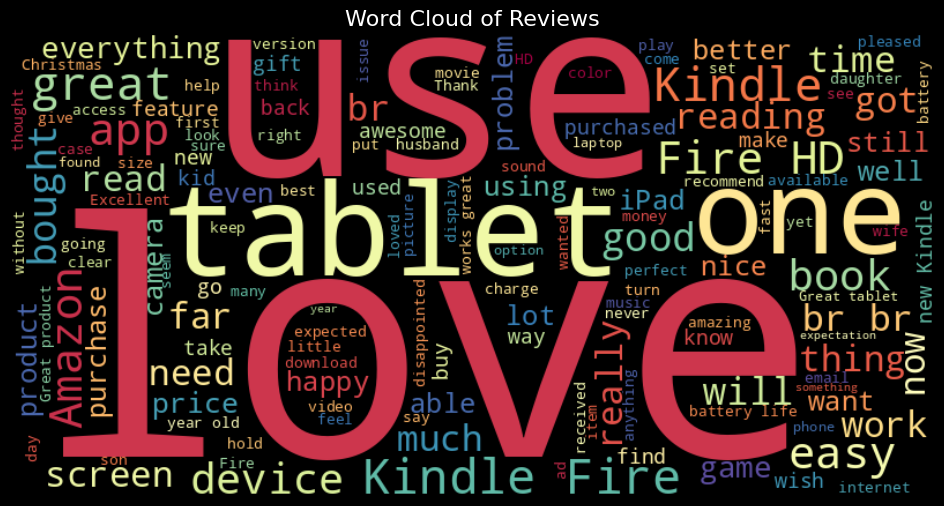

In [99]:
# 4. Perform Basic Text Analysis - Word Cloud

# Combine all cleaned reviews
all_reviews = ' '.join(data['review_body'])

# Generate a word cloud with a unique color scheme
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Black background for better contrast
    colormap='Spectral',       # Color scheme for a colorful word cloud
    contour_color='white',     # White contour for the words
    contour_width=1,           # Slight border around words for visibility
    random_state=42,           # Ensures reproducibility of the word cloud
    max_words=200,             # Limit the number of words to display
    min_font_size=10           # Minimum font size for clarity
).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with smooth interpolation
plt.axis('off')  # Hide axes for better visualization
plt.title('Word Cloud of Reviews', fontsize=16, color='white')  # Title with white color for contrast
plt.show()


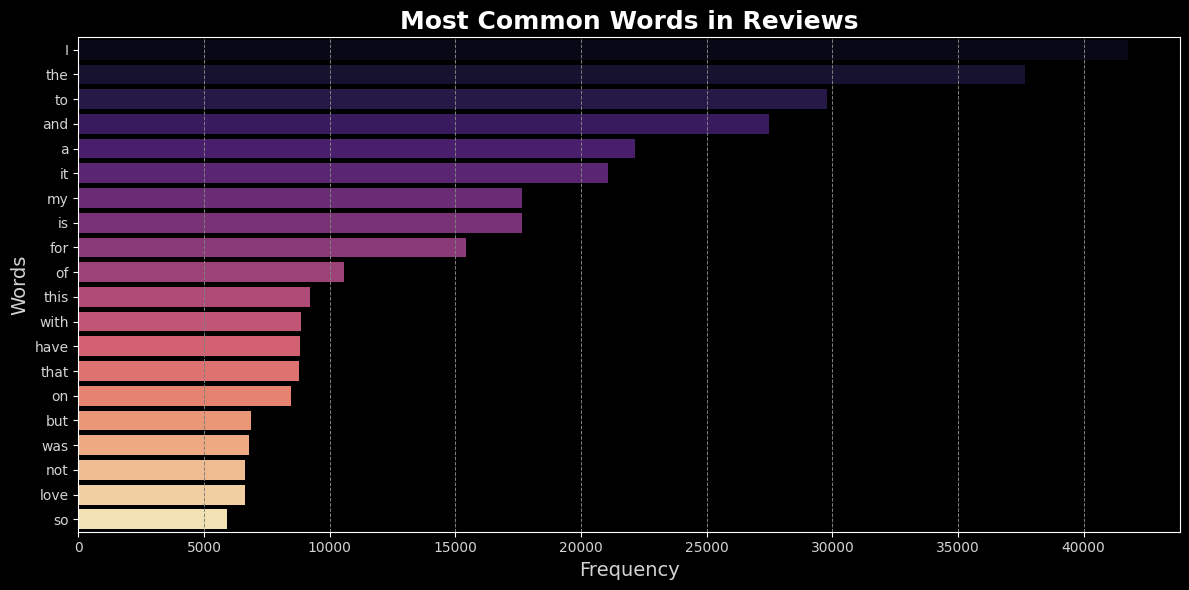

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# 5. Most Common Words

# Tokenize the cleaned review body
all_words = ' '.join(data['review_body']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words (e.g., top 20)
most_common_words = word_counts.most_common(20)

# Create a DataFrame from the most common words
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words with a vibrant color palette and custom styling
plt.figure(figsize=(12, 6))

# Use a barplot to display the word frequencies
sns.barplot(
    x='Frequency',
    y='Word',
    data=common_words_df,
    hue='Word',  # Assign 'Word' to hue to avoid deprecation warning
    palette='magma',  # 'magma' is a vibrant and visually appealing palette
    dodge=False,  # To avoid additional bars
    legend=False  # Disable legend
)

# Add plot title and labels with improved styling
plt.title('Most Common Words in Reviews', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Frequency', fontsize=14, color='lightgray')
plt.ylabel('Words', fontsize=14, color='lightgray')

# Customize gridlines for x-axis for clarity
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

# Set tick labels color for readability
plt.xticks(color='lightgray')
plt.yticks(color='lightgray')

# Set the background color of the plot
plt.gca().set_facecolor('black')  # Set the plot background to black for contrast

# Display the plot
plt.tight_layout()  # Prevent clipping of axis labels
plt.show()


### **Step 5: Feature Extraction and Text Processing** ###

In [102]:
# Function to clean text data
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the clean_text
data['cleaned_review_body'] = data['review_body'].apply(clean_text)


In [103]:
# Initialise the TF-IDF Vectorizer with stopwords and n-grams
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))  # Bigrams included

# Fit and transform the cleaned review body
X = vectorizer.fit_transform(data['cleaned_review_body'])

# Convert the sparse matrix to a DataFrame for easier handling (optional)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix and the first few features
print("Shape of TF-IDF matrix:", X.shape)
print("First few features:\n", tfidf_df.head())


Shape of TF-IDF matrix: (30840, 5000)
First few features:
    abc  abilities  ability  able  able access  able connect  able download  \
0  0.0        0.0      0.0   0.0          0.0           0.0            0.0   
1  0.0        0.0      0.0   0.0          0.0           0.0            0.0   
2  0.0        0.0      0.0   0.0          0.0           0.0            0.0   
3  0.0        0.0      0.0   0.0          0.0           0.0            0.0   
4  0.0        0.0      0.0   0.0          0.0           0.0            0.0   

   able load  able play  able read  ...  youtube  youtube app  youtube videos  \
0        0.0        0.0        0.0  ...      0.0          0.0             0.0   
1        0.0        0.0        0.0  ...      0.0          0.0             0.0   
2        0.0        0.0        0.0  ...      0.0          0.0             0.0   
3        0.0        0.0        0.0  ...      0.0          0.0             0.0   
4        0.0        0.0        0.0  ...      0.0          0.0      

### **Step 6: Model Selection and Model Training** ###

In [104]:
from sklearn.model_selection import train_test_split

# Assuming 'data' contains the sentiment labels and the TF-IDF features are stored in 'X'
X = vectorizer.fit_transform(data['cleaned_review_body'])
y = data['sentiment']  # This should be your sentiment labels

# Ensure no missing values in the target or features
data = data.dropna(subset=['cleaned_review_body', 'sentiment'])

# Split the data into training and test sets (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (24672, 5000)
Test set shape: (6168, 5000)


### **Step 7: Model Evaluation** ###

SVM Accuracy: 0.9045071335927367

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1015
           1       0.93      0.96      0.94      5153

    accuracy                           0.90      6168
   macro avg       0.84      0.79      0.81      6168
weighted avg       0.90      0.90      0.90      6168



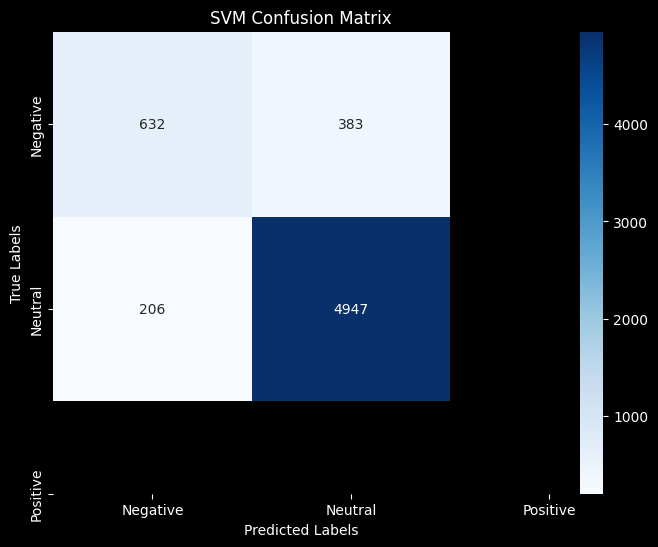

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)  # You can adjust kernel and C value

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Naive Bayes Accuracy: 0.8934824902723736

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.51      0.61      1015
           1       0.91      0.97      0.94      5153

    accuracy                           0.89      6168
   macro avg       0.84      0.74      0.78      6168
weighted avg       0.89      0.89      0.88      6168



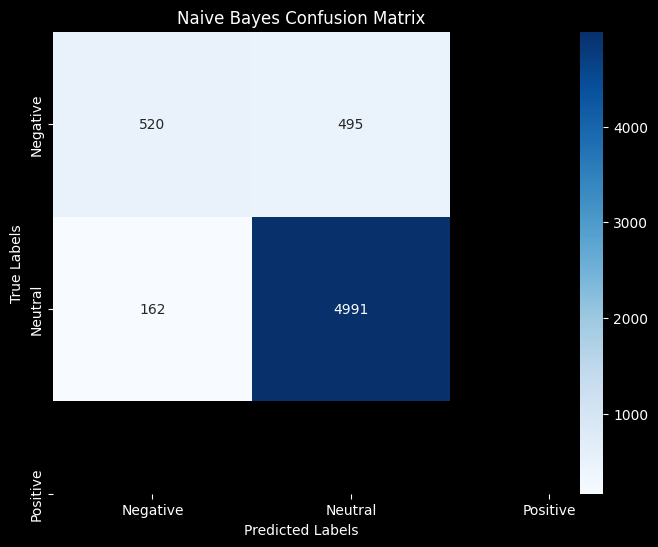

In [106]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
771/771 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.8377 - loss: 0.4767 - val_accuracy: 0.8354 - val_loss: 0.4482
Epoch 2/5
771/771 ━━━━━━━━━━━━━━━━━━━━ 141s 112ms/step - accuracy: 0.8349 - loss: 0.4521 - val_accuracy: 0.8354 - val_loss: 0.4530
Epoch 3/5
771/771 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.8334 - loss: 0.4537 - val_accuracy: 0.8354 - val_loss: 0.4478
Epoch 4/5
771/771 ━━━━━━━━━━━━━━━━━━━━ 140s 114ms/step - accuracy: 0.8365 - loss: 0.4476 - val_accuracy: 0.8354 - val_loss: 0.4487
Epoch 5/5
771/771 ━━━━━━━━━━━━━━━━━━━━ 89s 116ms/step - accuracy: 0.8374 - loss: 0.4453 - val_accuracy: 0.8354 - val_loss: 0.4474
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8453 - loss: 0.4319
CNN Accuracy: 0.835440993309021
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


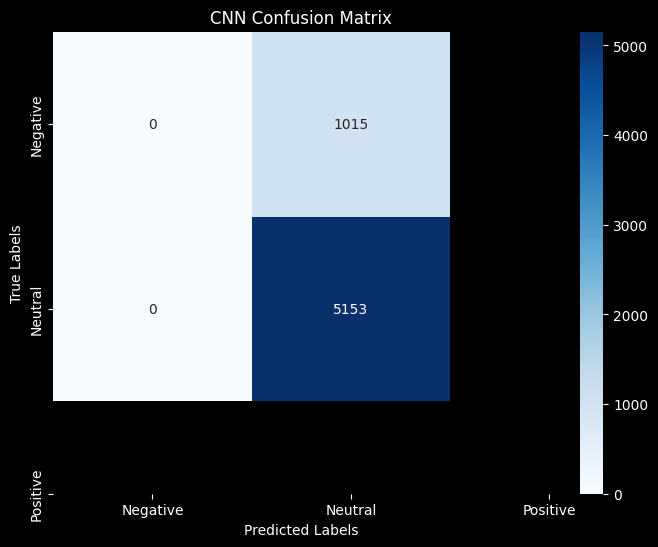

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the CNN model
cnn_model = Sequential()

# Add an embedding layer to transform words into dense vectors (you could also use pre-trained embeddings)
cnn_model.add(Embedding(input_dim=len(vectorizer.get_feature_names_out()), output_dim=100, input_length=X.shape[1]))

# Add convolutional layer (1D CNN)
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

# Add a max-pooling layer
cnn_model.add(MaxPooling1D(pool_size=4))

# Add a global max pooling layer
cnn_model.add(GlobalMaxPooling1D())

# Add a fully connected layer
cnn_model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation for multi-class classification
cnn_model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: Negative, Neutral, Positive

# Compile the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model (we need to pad sequences since CNNs expect fixed-length inputs)
X_train_padded = pad_sequences(X_train.toarray(), maxlen=500)  # Pad sequences to a max length
X_test_padded = pad_sequences(X_test.toarray(), maxlen=500)

cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print("CNN Accuracy:", cnn_accuracy[1])

# Make predictions
y_pred_cnn = cnn_model.predict(X_test_padded)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1).numpy()  # Convert softmax probabilities to class labels

# Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### **Step 8: Performance Metrics** ###

Feature importance:
           Feature  Coefficient  Importance
2723          love     7.412585    7.412585
1064  disappointed    -6.165078    6.165078
2811         loves     5.967813    5.967813
1800         great     5.960109    5.960109
295        awesome     4.787879    4.787879
1199          easy     4.672501    4.672501
3251       perfect     4.442863    4.442863
112        amazing     4.324258    4.324258
1267      enjoying     4.222261    4.222261
3814        return    -4.104852    4.104852


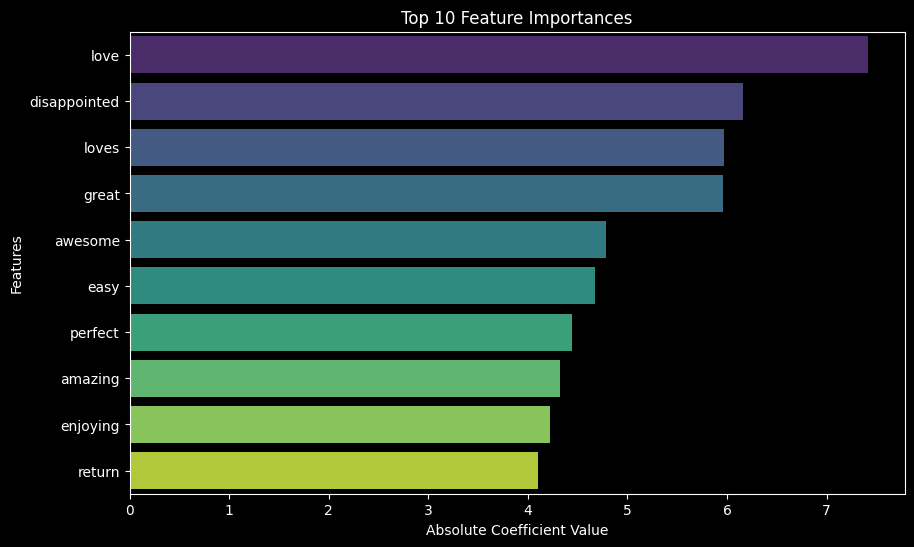

In [108]:
import numpy as np
# Model Interpretation
if hasattr(model, 'coef_'):
    # Get feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the coefficients
    coefficients = model.coef_[0]

    # Create a DataFrame to display feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Calculate absolute importance and sort
    importance_df['Importance'] = np.abs(importance_df['Coefficient'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display feature importance
    print("Feature importance:")
    print(importance_df.head(10))  # Display top 10 features

    # Visualisation of feature importance
    # Visualisation of feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=importance_df.head(10),
        x='Importance',
        y='Feature',
        hue='Feature',  # Assign 'Feature' to hue
        palette='viridis',
        dodge=False  # To avoid additional bars
    )
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Features')
    plt.legend([],[], frameon=False)  # Disable legend
    plt.show()
